<i><b>Public-AI</b></i>
#### week 2. 협업 필터링
# Section 1. 협업 필터링의 기본 개념

유저에게 아이템을 추천할 때 사용할 수 있는 정보에는 (1) 유저 정보 (2) 아이템 정보 (3) 유저와 아이템 사이의 상호작용 정보가 있을 것입니다. 하지만 실무에서 유저와 아이템의 정확한 정보를 풍부하게 확보하는 것은 쉬운 일이 아닙니다. 이러한 문제를 극복하고자 연구하고 개발된 것이 유저와 아이템 사이의 상호작용 데이터를 이용해 유저간 혹은 아이템 간의 유사도를 계산하여 추천하는 협업 필터링(Collaborative Filtering)입니다. 이번 주차에는 추천 시스템의 핵심 알고리즘 중 하나인 협업 필터링의 기본 개념을 배우고, 상호작용 데이터를 이용해 유저 간 유사도를 구하는 다양한 방법을 알아보겠습니다. 

### _Objective_ 

* [문제 정의 : 어떤 아이템을 추천할 것인가?] 추천시스템 분야의 핵심 문제를 정의하고, 콘텐츠 정보 기반 추천의 한계를 알아봅니다.
* [기본 개념 : 협업 필터링과 유사도] 유저와 아이템 간의 상호작용 정보를 이용한 추천 시스템인 협업 필터링의 개념을 알아보고, 협업 필터링의 기본이 되는 유사도 알고리즘을 배웁니다.


In [ ]:
# 필요한 라이브러리 가져오기
%matplotlib inline
import os
import numpy as np
import pandas as pd

from datetime import datetime

from tensorflow.keras.utils import get_file
from itertools import combinations

import matplotlib.pyplot as plt

# [ 실습 데이터 : MOVIE LENS 데이터 ]
----

### 1. 데이터 불러오기

In [ ]:
ROOT_URL = "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/datasets"

movie_path = get_file("movies.csv", os.path.join(ROOT_URL, "movies.csv"))
movie_df = pd.read_csv(movie_path)

genre_path = get_file("genres.csv", os.path.join(ROOT_URL, "genres.csv"))
genre_df = pd.read_csv(genre_path)

rating_path = get_file("ratings.csv", os.path.join(ROOT_URL, "ratings.csv"))
rating_df = pd.read_csv(rating_path)

### `movie_df` 확인하기

In [ ]:
movie_df

### `genre_df` 확인하기

In [ ]:
genre_df

### `rating_df` 확인하기

In [ ]:
rating_df

# \[ 문제 정의 : 어떤 아이템을 추천할 것인가?\]
---

어떠한 유저가 "One Day"라는 영화를 재밌게 보고 나와서, "One Day"와 유사한 영화를 찾고 있다고 해봅시다.

## 1. 오늘의 주제

> "One Day"를 재미있게 본 사람에게 어떤 영화를 추천할까? 


영화 One day는 앤 해서웨이가 주연으로 나오는 아름다운 로맨스 드라마 영화입니다. 영화를 보고난 후 어떤 고객이 이와 비슷하게 여운이 깊게 남는 영화를 찾고 있다고 합시다. 이 고객에게는 어떤 영화를 추천해주는 것이 좋을까요? 

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2727B44558972A7E04" width="150">


## 2. 첫번째 해결방법, "장르"를 기준으로 추천하기 : 콘텐츠 정보 기반 추천의 한계

고객이 선호하는 아이템(혹은 콘텐츠)과 유사한 아이템을 찾는 가장 간단한 방법은 아이템의 정보를 이용하는 것입니다. 영화로 치면 영화의 장르 정보를 이용하여 이를 기준으로 추천할 영화를 찾는 것이죠. 동일한 장르를 가지는 영화를 찾아보고, 이를 기준으로 영화를 추천해보겠습니다.

### (1) `one day`에 대한 장르 정보 가져오기
영화의 장르 정보는 `genres` 에서 확인할 수 있는데, `genres`는 영화 제목으로 조회할 수는 없고 `movie_id`를 이용해 조회할 수 있습니다. `movies` 테이블에서 아이디 값을 확인한 후, 이를 이용해 조회해봅시다.

In [ ]:
# 위 영화'One Day'에 대한 정보 가져오기
movie_df[movie_df.title == 'One Day']

In [ ]:
# 'One Day' 영화에 대한 Genre 정보 가져오기


### (2) 영화 별 장르 집합 구성하기

하나의 영화에는 다양한 장르가 결합되어 있습니다. 각 영화별로 어떠한 장르 속성이 존재하는지를 파악하기 위해, 영화 정보와 장르 정보를 모두 가져와 분석하도록 하겠습니다.

In [ ]:
# TODO : 각 영화별로 장르 집합을 구해주세요


#### Oneday 영화의 장르 구성 가져오기

In [ ]:
# 

#### OneDay와 동일한 장르 구성을 가지고 있는 영화 가져오기

### (3) 콘텐츠(장르) 기반 추천의 한계 

이 영화 중에서는 One Day와 같이 한 커플의 만남에서 이별까지 다루는 서정적인 작품도 있을 것이고, 좀 더 치정극에 가까운 영화도 있을 겁니다. 같은 장르로 분류되기는 하지만, 위의 1075개 중에서도 One Day를 본 사람이 좋아할 만한 작품은 따로 존재할 것입니다. 또한 위 리스트에는 없지만, One Day를 좋아했던 사람들이라면 **이터널 선샤인**이라는 영화도 충분히 추천할만합니다. 테이블을 확인해보면 이터널 선샤인은 {Drama, Romance, Sci-Fi} 장르를 가지고 있어서 위의 방식으로 추천 영화 리스트를 뽑았을 땐 나오지 않았습니다.



이렇듯 콘텐츠 정보를 기반한 추천에서 콘텐츠 정보가 충분하지 않다면 위와 같이 적절한 추천을 수행하기가 어려워집니다. 콘텐츠 정보를 좀 더 모으는 방법, 예를 들면 장르를 세분화 한다던지, 감독 배우 등의 정보도 활용하는 방향도 있지만 이러한 작업들은 정보를 수집하고 정제하는 데 비용이 크게 듭니다. 이렇게 콘텐츠 정보를 활용하여 추천하는 방식에서 벗어나, 고객들의 상호작용 정보를 바탕으로 영화를 추천하는 방식으로 문제를 해결해보고자 합니다.

In [ ]:
eternal_movie_id = 7361

display(movie_df[movie_df.title == 'Eternal Sunshine of the Spotless Mind'])
genre_df[genre_df.movie_id==eternal_movie_id]

# \[ 기본 개념 : 협업 필터링과 유사도\]
----

앞서 다룬 장르를 활용한 추천은 영화의 콘텐츠 정보를 활용하여 추천하는 일종의 콘텐츠 기반 필터링(Content-based Filtering)에 속하는 알고리즘입니다. 이와 다르게 협업 필터링(Collaborative Filtering)은 유저와 제품 사이의 상호작용 데이터를 바탕으로 유저에게 이전에 좋아했던 제품과 **유사한** 제품을 추천하거나(Item-Baed Collaborative Filtering), 유저의 취향과 **유사한** 취향을 가진 고객이 좋아한 제품을 추천하는 방식(User-Based Collaborative Filtering)을 말합니다. 협업 필터링의 핵심은 이러한 아이템 혹은 유저간의 "유사함"을 어떻게 정의하는가에 있습니다. 지금 시간에는 아이템 혹은 유저 간의 "유사함"을 어떻게 정의하는지 배우도록 하겠습니다.

## 1. Content-based Filtering과 Collaborative-Filtering

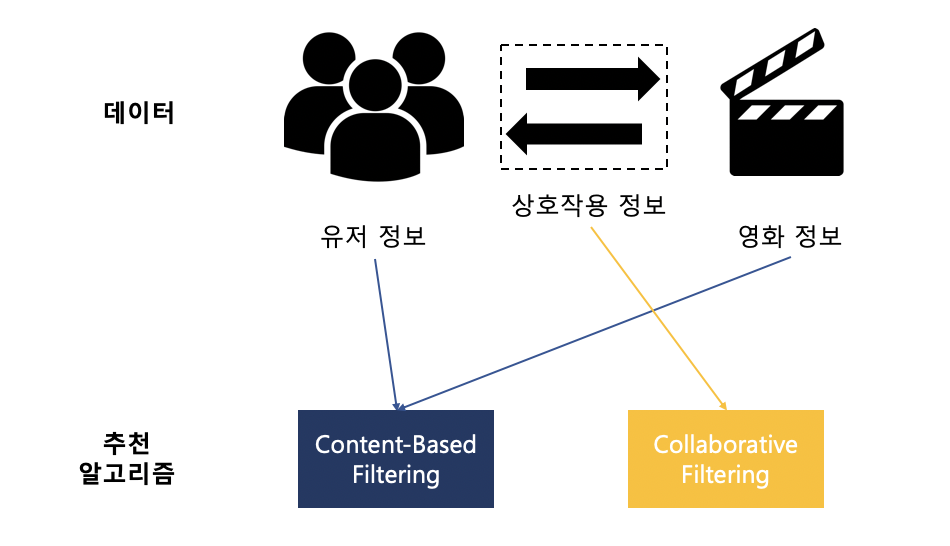

유저 정보와 영화 정보와 같이, 속성 정보를 바탕으로 추천하는 알고리즘을 통틀어 Content-Based Filtering이라 하고, 유저와 영화 간의 상호작용, 예를 들어 구매/ 페이지 뷰 / 평점 등의 행동들을 바탕으로 추천하는 알고리즘을 Collaborative Filtering이라 합니다. 위에서 다룬 "장르 정보에 기반한 추천"은 대표적으로 Content-Based Filtering에 속합니다. 아이템(혹은 영화)가 아닌 유저의 정보를 바탕으로 Content-Based Filtering 기법으로 추천을 하다면, 유저의 성별이나 지역 정보를 이용할 수 있을 것입니다. <br>

Content-Based Filtering을 적용하기 위해서는 유저 정보와 영화 정보를 수집하고, 정제해야 하는 어려움이 있습니다. 매년 엄청난 수의 영화가 상영되는데, 각 영화의 특성을 일정한 기준으로 일관되게 입력하는 것은 어려운 일입니다. 유저의 정보 역시 개인정보 보호 정책에 따라 쉽게 수집할 수 없습니다. 이처럼 유저 정보와 아이템 정보를 수집하는 어려움 때문에 이를 대신하여 시스템에 축적되는 유저와 아이템 사이의 상호작용 데이터를 이용해, 유저의 취향과 아이템의 특성을 도출하고자 하는 방향으로 많은 연구 개발이 이루어졌습니다. Collaborative Filtering 알고리즘은 이를 대표하는 방법론입니다.

## 2. 영화 데이터 가져오기

Collaborative Filtering에서 핵심이 되는 유사도 개념을 배워보기 위해 5개의 영화를 우선 선정했습니다. 

|  `movie_id` | 영화이름 |
| ---    | --- |
| 8957   | 쏘우     |
| 2232   | 큐브     |
| 6323   | 아이덴티티 |
| 8638   | 비포선셋  |
| 215    | 비포선라이즈 |


비포선셋과 비포선라이즈는 One Day와 동일한 "Romance" & "Drama"이고, 그 외 쏘우 큐브 아이덴티티는 그와 다른 공포영화입니다.

In [ ]:
target_movies = {8957: "Saw", 
                 2232: "Cube", 
                 6323: "Identity", 
                 8638: "Before Sunset", 
                 215: "Before Sunrise"}

#### 해당 영화에 대한 장르 정보 가져오기

In [ ]:
target_genre_df = genre_df[genre_df.movie_id.isin(target_movies)]
target_genre_df.movie_id = target_genre_df.movie_id.map(target_movies)
target_genre_df

비포 선라이즈와 비포선셋은 "Drama","Romance" 장르에 속합니다. 반면 큐브, 아이덴티티, 쏘우 작품은 "Horror","Mystery","Thriller"등의 장르로 분류됩니다. 

#### 평점 정보 가져오기

위 영화들에 대한 선호도 정보, 즉 리뷰에 남겨진 평점 정보를 가져오도록 하겠습니다.

In [ ]:
target_rating_df = rating_df[rating_df.movie_id.isin(target_movies)]

# rating_df의 movie_id를 알아볼 수 있는 영화제목으로 변경
target_rating_df.loc[:,"title"] = target_rating_df.movie_id.map(target_movies)
target_rating_df

#### UI Matrix 구성하기

유저가 Before Sunrise, Before Sunset, Cube, Identity, Saw에 대해 평가한 점수를 바탕으로 
유저 별로 각 영화를 어떻게 평가헀는지 알기 위해서 `user_id`를 인덱스로, `title`를 칼럼으로 하는 피벗테이블을 구성합니다. 

In [ ]:
ui_matrix = ""

## 3. 유사도의 개념

이제 각 유저가 영화에 대해 남긴 평점을 이용해 유저끼리 얼마나 비슷한지 알아봐야 합니다. 두 유저가 비슷하다는 건 어떻게 알 수 있을까요? 영화에 대한 평가가 비슷하면 유사한 취향을 가졌다고 볼 수 있을 것입니다. 영화에 대한 평점이 비슷하다는 것은 어떻게 알 수 있을까요? 먼저, 영화별로 매긴 별점을 빼보았는데 값의 차이가 적다면(= 거리가 가깝다면) 두 사람의 영화 취향이 비슷하다고 볼 수 있을 것입니다. 혹은 서로 긍정적으로 평가한 영화와 부정적으로 평가한 영화가 같다면(= 방향성이 비슷하다면) 두 사람의 영화 취향이 비슷하다고 볼 수 있을 것입니다. <br>

유사도를 계산하는 알고리즘은 다양한 분야에서 사용되는데, 기본적으로는 다음 세가지 지표가 많이 사용됩니다. 
- 거리를 활용한 유사도: 맨하탄 거리 유사도, 유클리디안 거리 유사도
- 방향성을 이용한 유사도 : 코사인 유사도

이외에도 유사도를 설정하는 방법은 다양합니다. 분야마다 적합한 유사도가 따로 존재합니다. 앞서 만든 편향이 제거된 평점 데이터에 유사도 알고리즘을 적용하여 계산해본다면 어떻게 해야 할까요? 이에 대한 이해를 돕기 위해 아래의 예시를 살펴보도록 하겠습니다. 거리 및 방향성을 이용한 유사도는 2차원 그래프에 그려 시각화하면 이해하기 쉽습니다. 2차원에 시각화하기 위해 예시로 Before Sunrise와 Saw 두 영화를 모두 본 사람에 한해서 무작위로 5명을 추출하였습니다.

In [ ]:
sample_cases = (
    ui_matrix
    [["Before Sunrise","Saw"]]
    .dropna()
    .sample(n=5, random_state=2)
).copy()

sample_cases

In [ ]:
ax = sample_cases.plot(kind='scatter',
                  x='Before Sunrise',
                  y='Saw',
                  c=['red','green','blue','purple','orange'],
                  xlim=[0, 5.5],
                  ylim=[0, 5.5],
                  figsize=(6,6))

sample_cases.index = ['red','green','blue','purple','orange']
plt.plot([0,6],[0,6],'--')
plt.title("What is Similarity?")
plt.xticks([0,1,2,3,4,5,6])
plt.yticks([0,1,2,3,4,5,6])
plt.show()

### (1) 거리($L_p norm$)를 활용한 유사도 계산

거리 유사도 계산 방법에는 유클리디안 거리 유사도와 맨해튼 거리 유사도가 있습니다. 각각에 대해 알아봅시다.

#### 유클리디안 거리 ($L_2\ Norm$)

유클리디안 거리는 직각삼각형에서 90도 각의 대변의 길이를 구하는 공식을 사용해 두 점 사이의 거리를 구하는 방법입니다. 거리값을 이용해 유사도를 구하는 식은 맨하튼 거리 유사도의 방식과 동일합니다.

$$
\mathbf{Dist(X,Y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}}
$$

In [ ]:
def l2_distance(x, y):
    return #

In [ ]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l2_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)
    print("{:>6}과 {:>6}의 유클리드 거리  : {:.3f}".format(c1_name, c2_name, dist))   

In [ ]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l2_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)
    print("{:>6}과 {:>6}의 유클리드 유사도 : {:.3f}".format(c1_name, c2_name, sim)) 

#### 맨해튼 거리 ($L_1\ Norm$)

맨해튼 거리는 뉴욕의 맨해튼의 거리 모양을 따서 지은 이름으로, L1 노름(Norm)이라고도 부릅니다. 맨바둑판에서 어떤 지점A에서 지점B까지를 대각선 없이 가는 거리를 측정한다고 했을 때, 그 방법으로 거리를 구하는 것이 맨하튼 거리입니다. 이를 수식으로 표현하면 아래와 같습니다.
$$
\mathbf{dist(X,Y) = \sum_{i=1}^n(|x_i - y_i|)}
$$

거리가 멀수록 유사도는 낮아져야 하므로, 맨하탄 거리값을 활용하여 아래와 같이 맨하탄 거리 유사도를 계산합니다.
$$
\mathbf{sim(X,Y) = \frac{1}{1+dist(X,Y)}}
$$

In [ ]:
def l1_distance(x, y):
    return 

앞서 구해놓은 `sample_cases`에서 두 유저씩 뽑아 pair를 만든 후, 각 페어의 맨하튼 거리를 구해보겠습니다.

In [ ]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(), 2):
    dist = l1_distance(c1_df.values, c2_df.values)
    print("{:>6}과 {:>6}의 맨해튼 거리  : {:.3f}".format(c1_name, c2_name, dist))

거리를 사용하여 유사도를 구해보겠습니다.

In [ ]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l1_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)    
    print("{:>6}과 {:>6}의 맨해튼 유사도 : {:.3f}".format(c1_name, c2_name, sim))    

맨해튼 거리와 유클리디안 거리는 둘 다 거리의 차이를 통해 유사도를 계산하지만, **각 축의 차이를 더 반영해야 할 때에는 맨해튼 거리를, 전반적인 취향을 종합하여 반영해야 할때에는 유클리디안 거리를 활용합니다.** 좀 더 자세히 설명하면, 한 축이라도 큰 차이가 그 차이를 그대로 유사도가 먼 것으로 반영하겠다면 맨해튼 거리를 사용하여 유사도를 계산하면 됩니다. 반면, 유클리디안 거리를 이용하면 한 축을 기준으로는 차이가 많이 나지만 다른 축을 기준으로는 가까운 경우와 양쪽 축에서 모두 중간 정도 거리의 차이가 있는 경우의 유사도를 비슷하게 볼 것입니다. 

### (2) 방향성을 이용한 유사도 계산

코사인 유사도는 두 아이템 벡터의 각도가 얼마나 차이나는지를 계산하는 방식입니다. 각도 상으로 같은 선상에 있다면, 직선 거리는 멀더라도 유사하다고 보는 것이죠. 

$$
\mathbf{Cosine\_Similarity(X,Y) = \frac{X \cdot Y}{|X| |Y|}}
$$

In [ ]:
def cosine_similarity(x, y):
    return 

In [ ]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    sim = cosine_similarity(c1_df.values, c2_df.values)
    print("{:>6}과 {:>6}의 유사도 : {:.3f}".format(c1_name, c2_name, sim))    

유사도 알고리즘은 이렇듯 유사함을 어떻게 정의하는가에 따라 서로 다른 수식을 적용해야 합니다. <올바른 유사도가 무엇인가?>에 대한 답은 늘 데이터에 따라 달라집니다. 일반적으로 현업 필터링에서 적용할 때에는 다양한 유사도 수식을 데이터에 적용해 의도했던 방향으로 순위가 매겨지거나, 결과가 도출되는지 확인해보고 유사도 수식을 결정하게 됩니다. 

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2020/01/13


---